<a href="https://colab.research.google.com/github/deepacu1986/DATA-SCIENCE-ASSIGNMENTS/blob/main/clustringassignment_with_K_Means_and_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLUSTERING ANALYSIS

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
df.drop(columns='ID#',inplace=True)
df.shape

(3999, 11)

In [ ]:
df.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(3998, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


In [ ]:
df.describe()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [ ]:
df['Award?'].value_counts()

,count
Award?,
0,2517
1,1481


In [ ]:
features = df.drop(columns='Award?')
features.head()
num_cols = features.select_dtypes(include=np.number).columns
num_cols
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]=scaler.fit_transform(features[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']])


In [ ]:
'''features.head()'''

'features.head()'

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit_predict(features)

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
df['Clusters']=kmeans.labels_

In [ ]:
df.Clusters.value_counts()

,count
Clusters,
0,2572
1,1426


In [ ]:
df.head(20)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
5,16420,0,1,1,1,0,0,0,0,6942,0,0
6,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1


In [ ]:
df1=df[df['Award?']==df['Clusters']]
df1.Clusters.value_counts()

,count
Clusters,
0,1899
1,808


In [ ]:
silhouette_score(features,kmeans.labels_)

np.float64(0.7055794068814111)

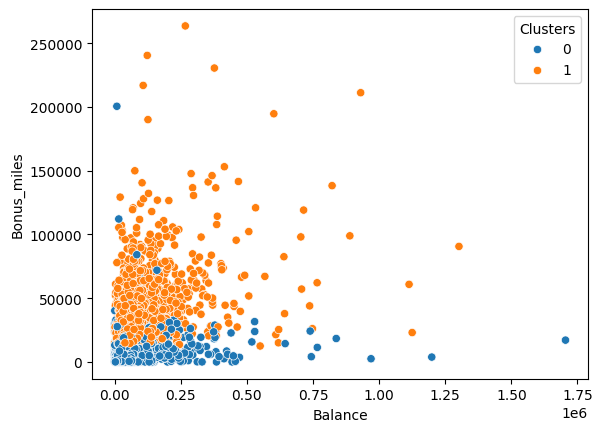

In [ ]:
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',hue='Clusters')
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[0.03049197, 0.01292712, 1.11041991, 1.02177294, 1.00544323,
        0.01815707, 0.08781059, 0.01418821, 0.02475131, 0.45951424,
        0.03888025],
       [0.06607226, 0.01293693, 3.77208976, 1.00140252, 1.02454418,
        0.14959027, 0.21994357, 0.01627458, 0.02803726, 0.56294526,
        0.12692847]])

In [ ]:
inertia=[]
for i in range(1,11):
      kmeans=KMeans(n_clusters=i)
      kmeans.fit(features)
      inertia.append(kmeans.inertia_)

In [ ]:
print(inertia)

[8472.618942575775, 1922.795609200411, 1205.6425031562949, 1011.1246668917481, 815.5787980799549, 720.8160014831122, 598.2660807789596, 553.298053924766, 467.1019365861827, 463.67205019957913]


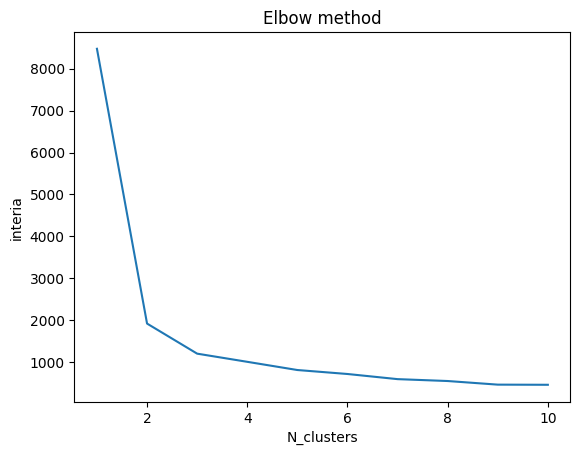

In [ ]:
plt.plot(range(1,11),inertia)
plt.xlabel('N_clusters')
plt.ylabel('interia')
plt.title('Elbow method')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(features)

In [ ]:
silhouette_score(features,kmeans.labels_)

np.float64(0.7055794068814111)

In [ ]:
# hierarchical clustings

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


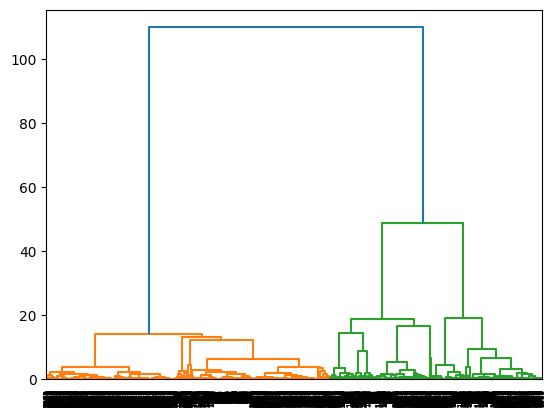

In [ ]:
dendogram=sch.dendrogram(sch.linkage(features,method='ward'))

In [ ]:
agg=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [ ]:
cluster=agg.fit(features)

In [ ]:
cluster.labels_

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
silhouette_score(features,cluster.labels_)

np.float64(0.6498452778857282)

In [ ]:
# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
output=[]
eps=np.arange(0.1,0.7,0.1)
min_samples=np.arange(1,10,1)

In [ ]:
for i in eps:
  for j in min_samples:
    dbscan=DBSCAN(eps=i,min_samples=j)
    dbscan.fit(features)
    output.append([i,j,silhouette_score(features,dbscan.labels_)])
print(output)

[[np.float64(0.1), np.int64(1), np.float64(-0.24699877681443658)], [np.float64(0.1), np.int64(2), np.float64(-0.08030535746443483)], [np.float64(0.1), np.int64(3), np.float64(0.34216195665155147)], [np.float64(0.1), np.int64(4), np.float64(0.5182828398965191)], [np.float64(0.1), np.int64(5), np.float64(0.5139177029928454)], [np.float64(0.1), np.int64(6), np.float64(0.5064078782930883)], [np.float64(0.1), np.int64(7), np.float64(0.5030994136642989)], [np.float64(0.1), np.int64(8), np.float64(0.17283828558355963)], [np.float64(0.1), np.int64(9), np.float64(0.10636236410875761)], [np.float64(0.2), np.int64(1), np.float64(0.2857111964217696)], [np.float64(0.2), np.int64(2), np.float64(0.4251431078013113)], [np.float64(0.2), np.int64(3), np.float64(0.6353986907595671)], [np.float64(0.2), np.int64(4), np.float64(0.6453052507852416)], [np.float64(0.2), np.int64(5), np.float64(0.6418823635426649)], [np.float64(0.2), np.int64(6), np.float64(0.6383977698875546)], [np.float64(0.2), np.int64(7), n

In [ ]:
data=pd.DataFrame(output,columns=['eps','mins','score'])
data

,eps,mins,score
0,0.1,1,-0.246999
1,0.1,2,-0.080305
2,0.1,3,0.342162
3,0.1,4,0.518283
4,0.1,5,0.513918
5,0.1,6,0.506408
6,0.1,7,0.503099
7,0.1,8,0.172838
8,0.1,9,0.106362
9,0.2,1,0.285711


In [ ]:
#data.score.max()
score=data.loc[:,'score'].max()
score

0.6776388874379417

In [ ]:
data[data.score==score]

,eps,mins,score
46,0.6,2,0.677639


In [ ]:
labels=DBSCAN(eps=0.6,min_samples=2).fit(features).labels_

In [ ]:
df['DBSCAN_labels']=labels
df
display(df.DBSCAN_labels.value_counts())

,count
DBSCAN_labels,
0,2153
2,577
1,452
3,273
4,203
5,88
8,80
6,66
7,33


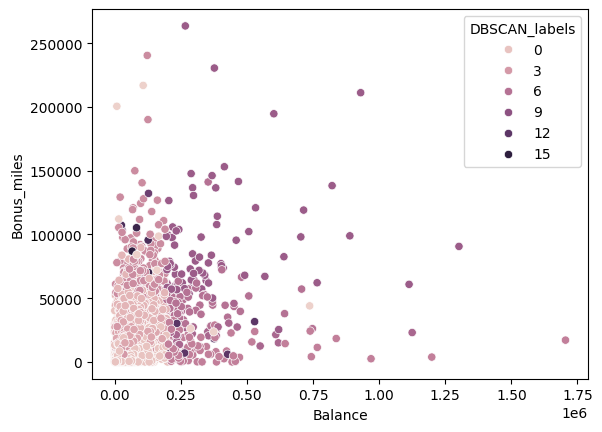

In [ ]:
sns.scatterplot(data=df,x='Balance',y='Bonus_miles',hue='DBSCAN_labels')
plt.show()

In [ ]:
import plotly.express as pe
pe.scatter(df,x='Balance',y='Bonus_miles',color='DBSCAN_labels')

In [ ]:
np.where(labels<0)

(array([   8,  106,  343,  561,  904, 1036, 1244, 1300, 2251, 2364, 2674,
        2840, 2955, 3235, 3338, 3583, 3788]),)

In [ ]:
df.drop(index=np.where(labels<0)[0],inplace=True)

In [ ]:
silhouette_score(features,labels)

np.float64(0.6776388874379417)